<b>
<p>
<center>
<font size="9">
Weather Image Recognition
</font>
</center>
</p>

<p>
<center>
<font size="5">
using
</font>
</center>
</p>

<p>
<center>
<font size="6">
 Convolutional Neural Networks(CNNs)
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Machine Learning I
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<p></p>
<font size="5">
Ramana Bhaskar Kosuru(G44367009)
</font>
<p></p>
</center>
</p>
</b>

# Overview

- This notebook includes code for Convolutional Neural Networks used to classify weather images.
- Here we will work on the Kaggle Dataset [weather_image_Recognition](https://www.kaggle.com/datasets/jehanbhathena/weather-dataset).
- The goal of this project is to build pipeline for Deeplearning pre-trained models that can classify the weather images with highest acccuracy.


# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML_1/Final Project/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/ML_1/code/utilities/p3_deep_learning/'

Mounted at /content/drive


## Warning

In [2]:

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Print TensorFlow version to verify
print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.1


## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/ML_1/code/utilities/p3_deep_learning


## Loading the data

In this project, we will work on the [weather_image_recognition](https://www.kaggle.com/datasets/jehanbhathena/weather-dataset/data) dataset.

### Creating the directory for the data

In [7]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/dataset/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Downloading the data to the directory

In [8]:

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=abspath_curr + '/dataset/',
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=None,
    label_mode='int',  # Labels are returned as integers
    shuffle=True  # Shuffle the dataset before splitting
)
print("\nThe length of the dataset is ", len(dataset))

Found 6862 files belonging to 11 classes.

The length of the dataset is  6862


## Getting the name of the target

In [9]:
target = 'label'

## Getting the info

In [10]:
# Display class names

classes = dataset.class_names

print(classes)


['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [11]:
# Get the number of classes
n_classes = len(classes)

# Print the number of classes
len(classes)


11

## Getting the training, validation and test data

In [12]:

# Get the total number of images
total_size = len(dataset)

print(total_size)

6862


In [13]:
# Calculate the sizes for Train (70%), Validation (15%), and Test (15%)
train_size = int(0.70 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # The remaining 15%

# Split the dataset using random_split
data_train = dataset.take(train_size)
data_rest = dataset.skip(train_size)
data_valid = data_rest.take(val_size)
data_test = data_rest.skip(val_size)



In [14]:
# Print the sizes of each split
print(f"Total images: {total_size}")
print(f"Train size: {len(data_train)}")
print(f"Validation size: {len(data_valid)}")
print(f"Test size: {len(data_test)}")

Total images: 6862
Train size: 4803
Validation size: 1029
Test size: 1030


## Resizing the data for pretrained model

In [15]:
# Set the default input size for the pretrained model
global input_size
input_size = [300, 300]

In [16]:
def resize(image, label):
    image = tf.image.resize(image, input_size)  # Resize image to input size
    return image, label

# Resize the training data
data_train = data_train.map(resize)

# Resize the validation data
data_valid = data_valid.map(resize)

# Resize the test data
data_test = data_test.map(resize)

## Preprocessing the data using pretrained model

In [17]:
# Set the preprocess_input of the pretrained model

# Importing EfficientNetB3 and preprocess_input

from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input



In [18]:
# Define the preprocessing function
def preprocess_pretrain(image, label):

    # Resize the image to 300x300
    image = tf.image.resize(image, (300, 300))

    # Normalize the image
    image = keras.applications.efficientnet.preprocess_input(image)

    return image, label


# Preprocess the training data using pretrained model

data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
data_test = data_test.map(preprocess_pretrain)

## Shuffling, batching and prefetching the data

In [19]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 32

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the directory for the model

In [20]:
# Make directory
directory = os.path.dirname(abspath_curr + '/EfficientNetB3/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [21]:

# Load the pretrained EfficientNetB3 model layers
pretrained_model = keras.applications.EfficientNetB3(include_top=False, weights='imagenet')

# Add a GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add Dropout layer to prevent overfitting
dropout = keras.layers.Dropout(0.5)(average_pooling)

# Add the Dense output layer with softmax activation
output = keras.layers.Dense(n_classes, activation='softmax')(dropout)

# Create the final model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

# Print the model summary
model.summary()




43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, None, None, 3)  │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, None, None, 3)  │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 40) │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 40) │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 40) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, None, None, 40) │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, None, None, 40) │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, None, None, 40) │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 10,800,442 (41.20 MB)

 Trainable params: 10,713,139 (40.87 MB)

 Non-trainable params: 87,303 (341.03 KB)

## Freezing the pretrained layers

In [22]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Callbacks

In [23]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/EfficientNetB3/result/model/model.weights.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the model
I used the default learning rate of Adam optimizer.

In [24]:
#Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Training the model

In [25]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=20,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.4838 - loss: 1.5528 - val_accuracy: 0.8309 - val_loss: 0.6096 - learning_rate: 0.0010
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - accuracy: 0.7880 - loss: 0.6693 - val_accuracy: 0.8669 - val_loss: 0.4734 - learning_rate: 0.0010
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 35s 217ms/step - accuracy: 0.8263 - loss: 0.5349 - val_accuracy: 0.8805 - val_loss: 0.4200 - learning_rate: 0.0010
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 188ms/step - accuracy: 0.8378 - loss: 0.4851 - val_accuracy: 0.8756 - val_loss: 0.3939 - learning_rate: 0.0010
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 177ms/step - accuracy: 0.8486 - loss: 0.4627 - val_accuracy: 0.8902 - val_loss: 0.3519 - learning_rate: 0.0010
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 174ms/step - accuracy: 0.8604 - loss: 0.4149 - val_accuracy: 0.8912 - val_loss: 0.3455 - learning_rate: 0.0010
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 153ms/step - accuracy: 0.866

## Plotting the learning curve

### Creating the directory for the figure

In [26]:
# Make directory
directory = os.path.dirname(abspath_curr + '/EfficientNetB3/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

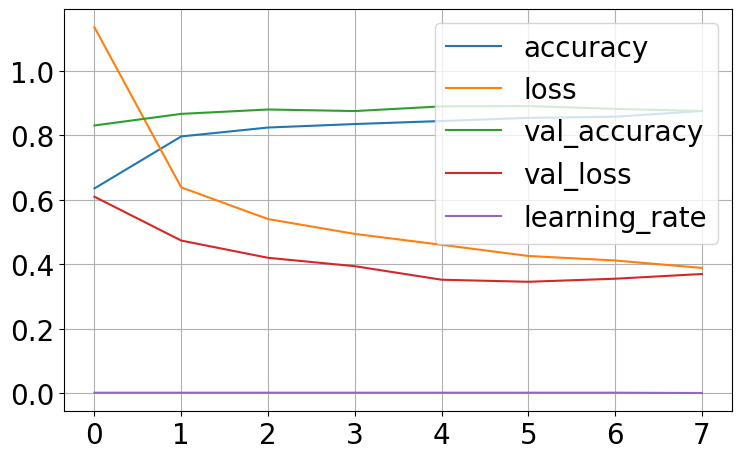

In [27]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/EfficientNetB3/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [28]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.



In [29]:

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [30]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=15,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 219s 672ms/step - accuracy: 0.7867 - loss: 0.6682 - val_accuracy: 0.9291 - val_loss: 0.2197 - learning_rate: 1.0000e-04
Epoch 2/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.9303 - loss: 0.2232 - val_accuracy: 0.9543 - val_loss: 0.1635 - learning_rate: 1.0000e-04
Epoch 3/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.9536 - loss: 0.1475 - val_accuracy: 0.9670 - val_loss: 0.1165 - learning_rate: 1.0000e-04
Epoch 4/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 199ms/step - accuracy: 0.9703 - loss: 0.0976 - val_accuracy: 0.9670 - val_loss: 0.1137 - learning_rate: 1.0000e-04
Epoch 5/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9787 - loss: 0.0732 - val_accuracy: 0.9747 - val_loss: 0.1047 - learning_rate: 1.0000e-04
Epoch 6/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 183ms/step - accuracy: 0.9871 - loss: 0.0482 - val_accuracy: 0.9718 - val_loss: 0.1284 - learning_rate: 1.0000e-04
Epoch 7/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 1

## Plotting the learning curve

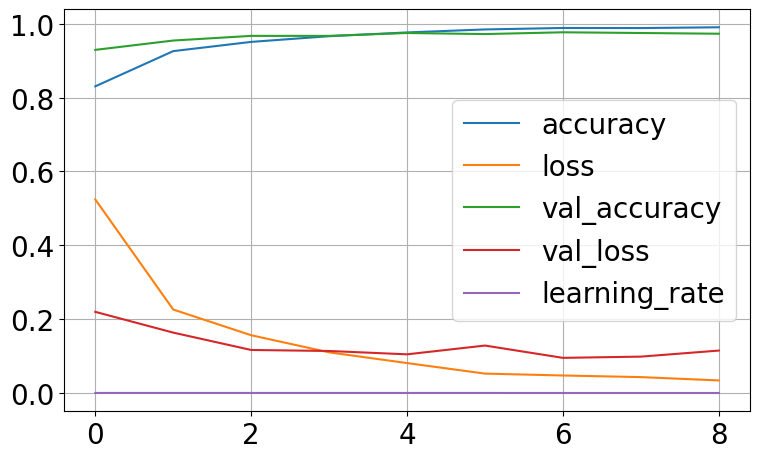

In [31]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/EfficientNetB3/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing

## Loading the saved model

In [32]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/EfficientNetB3/result/model/model.weights.h5')

## Evaluating the model

In [33]:
loss, accuracy = model.evaluate(data_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 513ms/step - accuracy: 0.9507 - loss: 0.1524
